In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
gcc_result = {
    "mlp": {
        "bert_cls": {"top-1":37, "top-5":57.95, "top-10":70.54, "mrr":47.99},
        "bert_mean": {"top-1":42.99, "top-5":64.84, "top-10":75.53, "mrr":53.80},
        "glove_mean":{"top-1":40.76, "top-5":65.4, "top-10":74.88, "mrr":52.07}},
    "cnn": {
        "bert": {"top-1":57.72, "top-5":80.99, "top-10":85.98, "mrr":68.34}, 
        "glove":{"top-1":40.82, "top-5":78.23, "top-10":89.11, "mrr":57.08}},
    "lstm": {
        "bert": {"top-1":31.83, "top-5":53.91, "top-10":68.4, "mrr":43.81}, 
        "glove":{"top-1":11.37, "top-5":41.7, "top-10":56.78, "mrr":26.68}},
    "bi-lstm": {
        "bert": {"top-1":39.67, "top-5":67.69, "top-10":77.43, "mrr":52.48}, 
        "glove":{"top-1":35.55, "top-5":59.71, "top-10":71.09, "mrr":47.68}},
    "residual-lstm": {
        "bert": {"top-1":28.74, "top-5":53.68, "top-10":69.35, "mrr":40.9},
        "glove":{"top-1":11.37, "top-5":41.7, "top-10":54.5, "mrr":26.5}},
    "residual-bi-lstm": {
        "bert": {"top-1":39.43, "top-5":69.12, "top-10":80.04, "mrr":52.97}, 
        "glove":{"top-1":36.97, "top-5":59.71, "top-10":72.03, "mrr":48.63}},
    "lstm-attention": {
        "bert": {"top-1":47.51, "top-5":74.34, "top-10":83.37, "mrr":59.52}, 
        "glove":{"top-1":13.27, "top-5":41.70, "top-10":59.24, "mrr":27.68}},
    "bi-lstm-attention": {
        "bert": {"top-1":50.59, "top-5":74.34, "top-10":80.99, "mrr":61.00}, 
        "glove":{"top-1":34.12, "top-5":58.29, "top-10":71.09, "mrr":46.08}},
    "residual-lstm-attention": {
        "bert": {"top-1":42.28, "top-5":66.98, "top-10":77.9, "mrr":54.01}, 
        "glove":{"top-1":13.27, "top-5":43.12, "top-10":56.87, "mrr":30.94}},
    "residual-bi-lstm-attention": {
        "bert": {"top-1":45.61, "top-5":71.49, "top-10":81.23, "mrr":57.45}, 
        "glove":{"top-1":39.34, "top-5":64.92, "top-10":77.72, "mrr":51.48}},
}

jdt_result = {
    "mlp": {
        "bert_cls": {"top-1":21.5, "top-5":58.02, "top-10":78.15, "mrr":38.5},
        "bert_mean": {"top-1":25.94, "top-5":61.43, "top-10":78.49, "mrr":41.39},
        "glove_mean":{"top-1":16.72, "top-5":55.63, "top-10":76.45, "mrr":35.5}},
    "cnn": {
        "bert": {"top-1":44.03, "top-5":78.49, "top-10":88.39, "mrr":58.74},
        "glove":{"top-1":42.18, "top-5":75.51, "top-10":88.43, "mrr":56.3}},
    "lstm": {
        "bert": {"top-1":20.14, "top-5":59.38, "top-10":79.18, "mrr":37.21},
        "glove":{"top-1":14.97, "top-5":53.06, "top-10":75.51, "mrr":31.77}},
    "bi-lstm": {
        "bert": {"top-1":37.20, "top-5":73.72, "top-10":84.98, "mrr":53.32},
        "glove":{"top-1":38.10, "top-5":72.10, "top-10":82.99, "mrr":52.76}},
    "residual-lstm": {
        "bert": {"top-1":19.11, "top-5":57.67, "top-10":78.15, "mrr":37.09},
        "glove":{"top-1":14.29, "top-5":53.06, "top-10":75.51, "mrr":31.26}},
    "residual-bi-lstm": {
        "bert": {"top-1":36.52, "top-5":68.94, "top-10":87.03, "mrr":52.17},
        "glove":{"top-1":38.10, "top-5":70.74, "top-10":82.99, "mrr":52.49}},
    "lstm-attention": {
        "bert": {"top-1":40.61, "top-5":71.67, "top-10":84.64, "mrr":55.00},
        "glove":{"top-1":29.93, "top-5":63.26, "top-10":82.31, "mrr":45.07}},
    "bi-lstm-attention": {
        "bert": {"top-1":40.27, "top-5":74.74, "top-10":85.66, "mrr":55.11},
        "glove":{"top-1":36.73, "top-5":74.82, "top-10":82.99, "mrr":52.32}},
    "residual-lstm-attention": {
        "bert": {"top-1":37.88, "top-5":77.81, "top-10":86.68, "mrr":56.06},
        "glove":{"top-1":34.01, "top-5":69.38, "top-10":82.99, "mrr":48.68}},
    "residual-bi-lstm-attention": {
        "bert": {"top-1":39.25, "top-5":76.10, "top-10":87.03, "mrr":54.9},
        "glove":{"top-1":44.9, "top-5":74.14, "top-10":82.99, "mrr":58.02}},
}

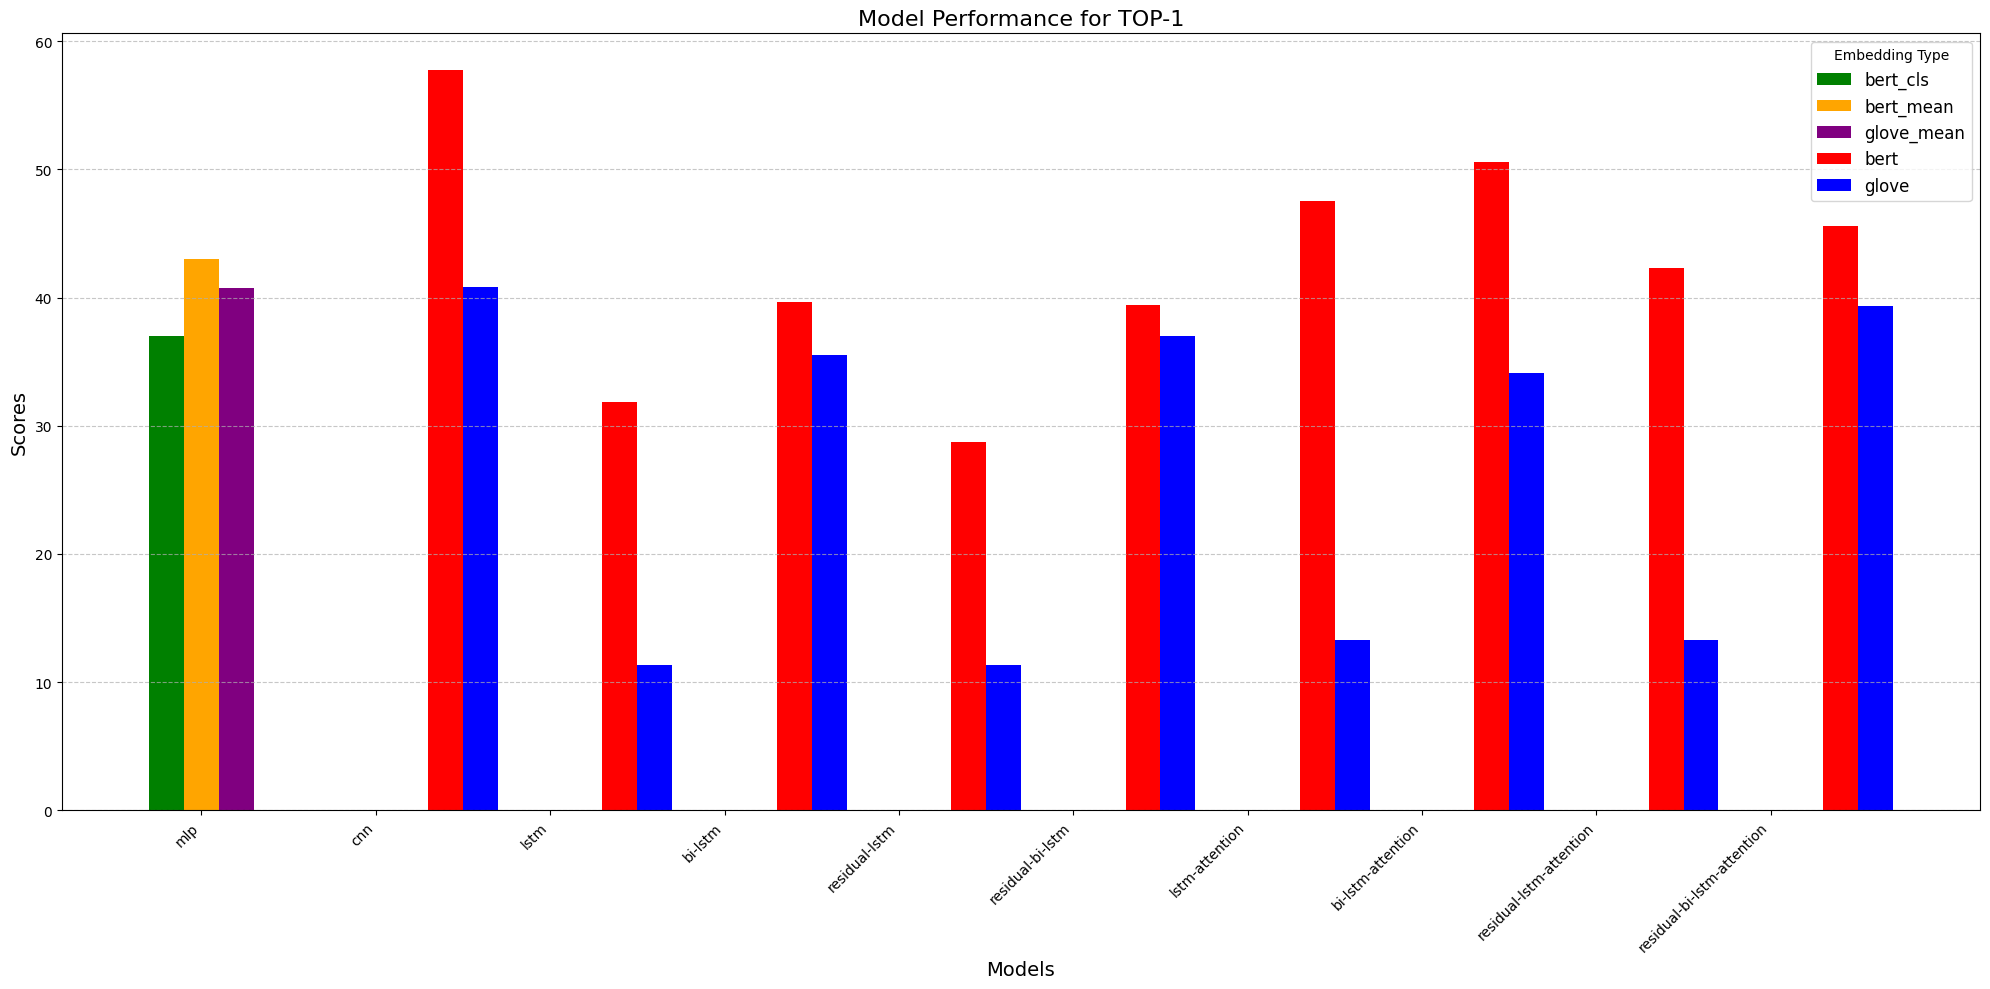

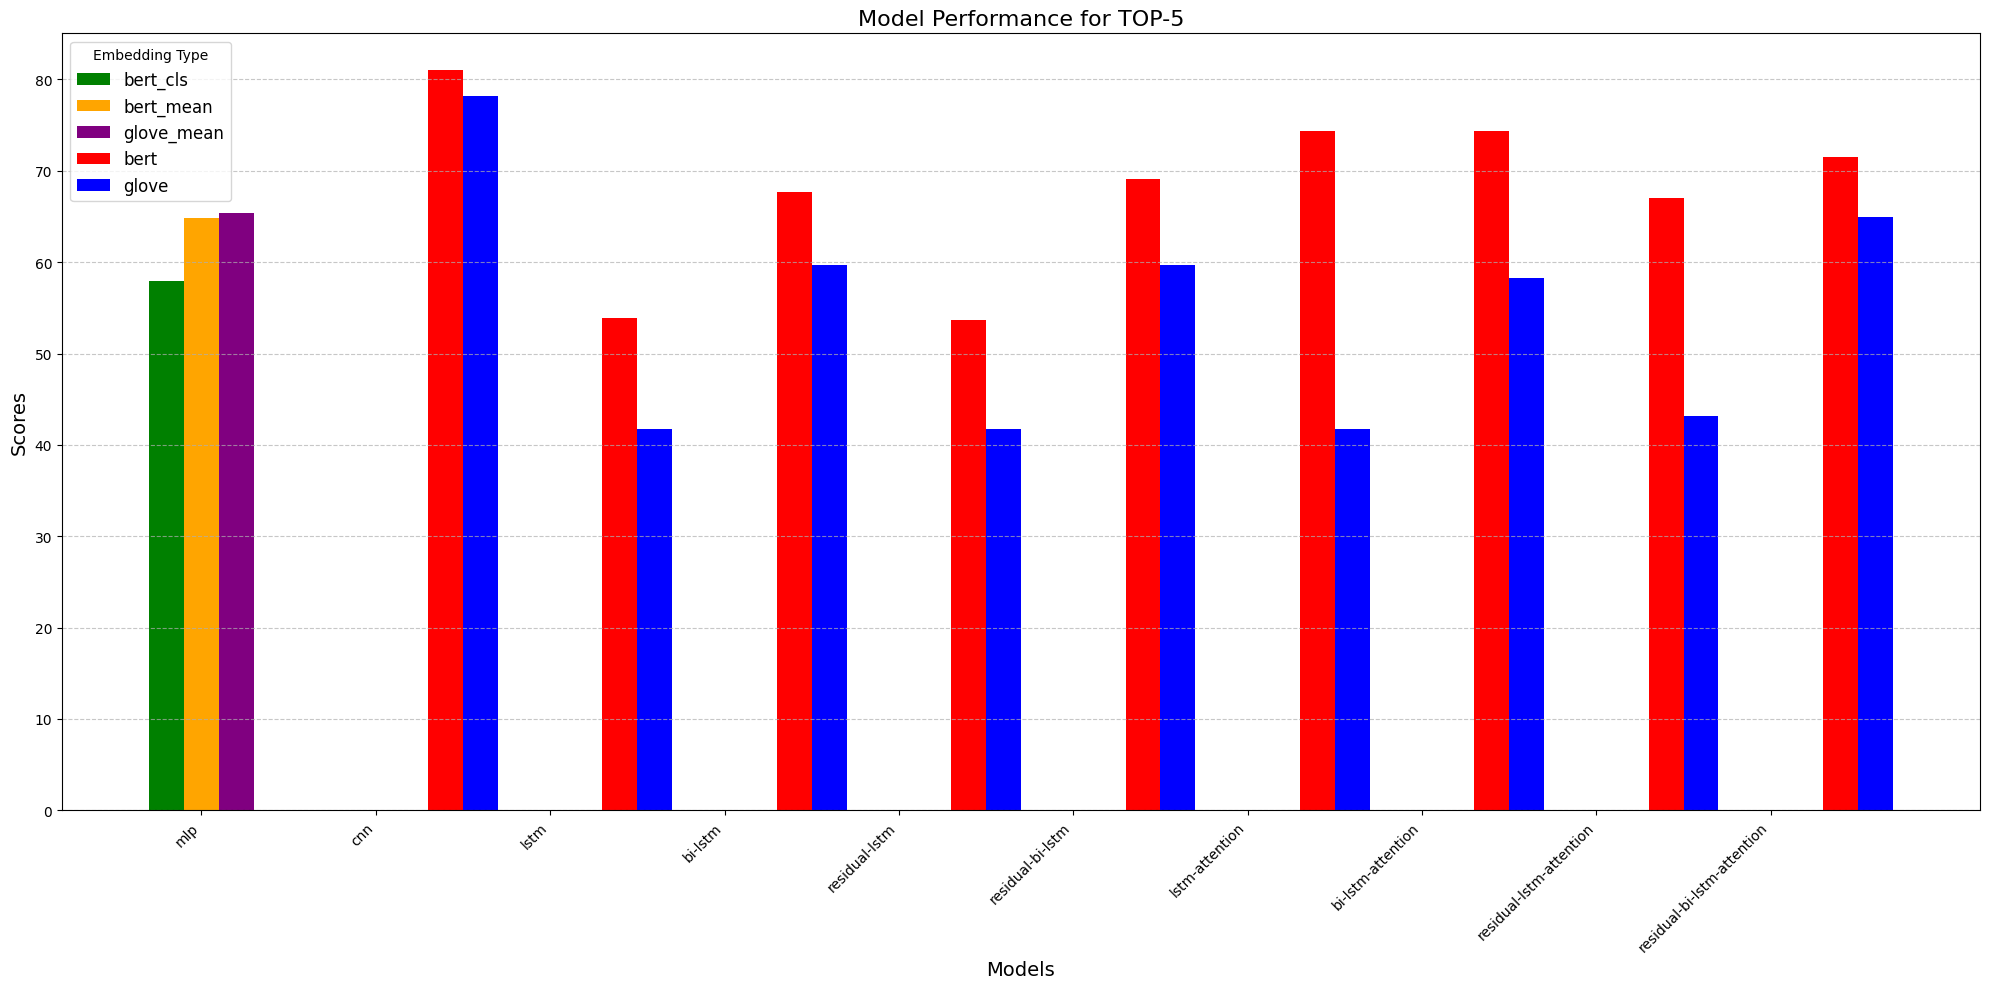

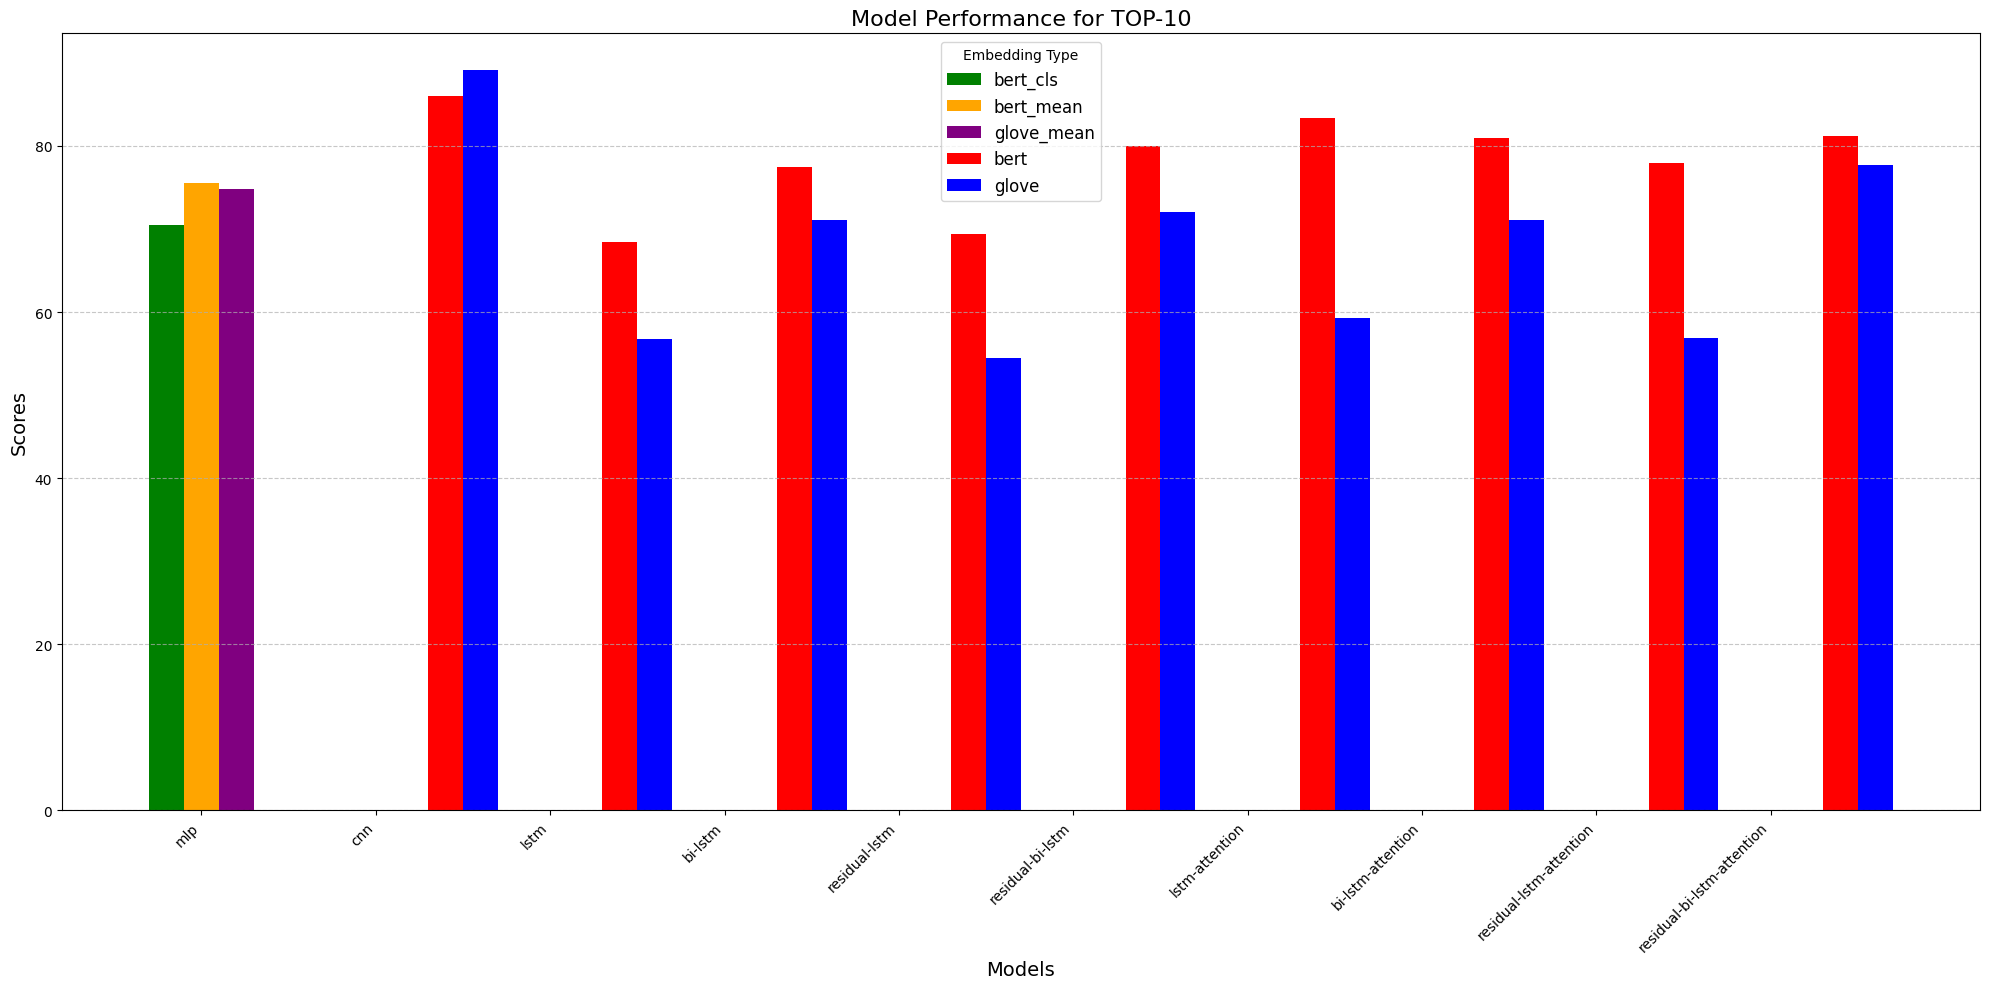

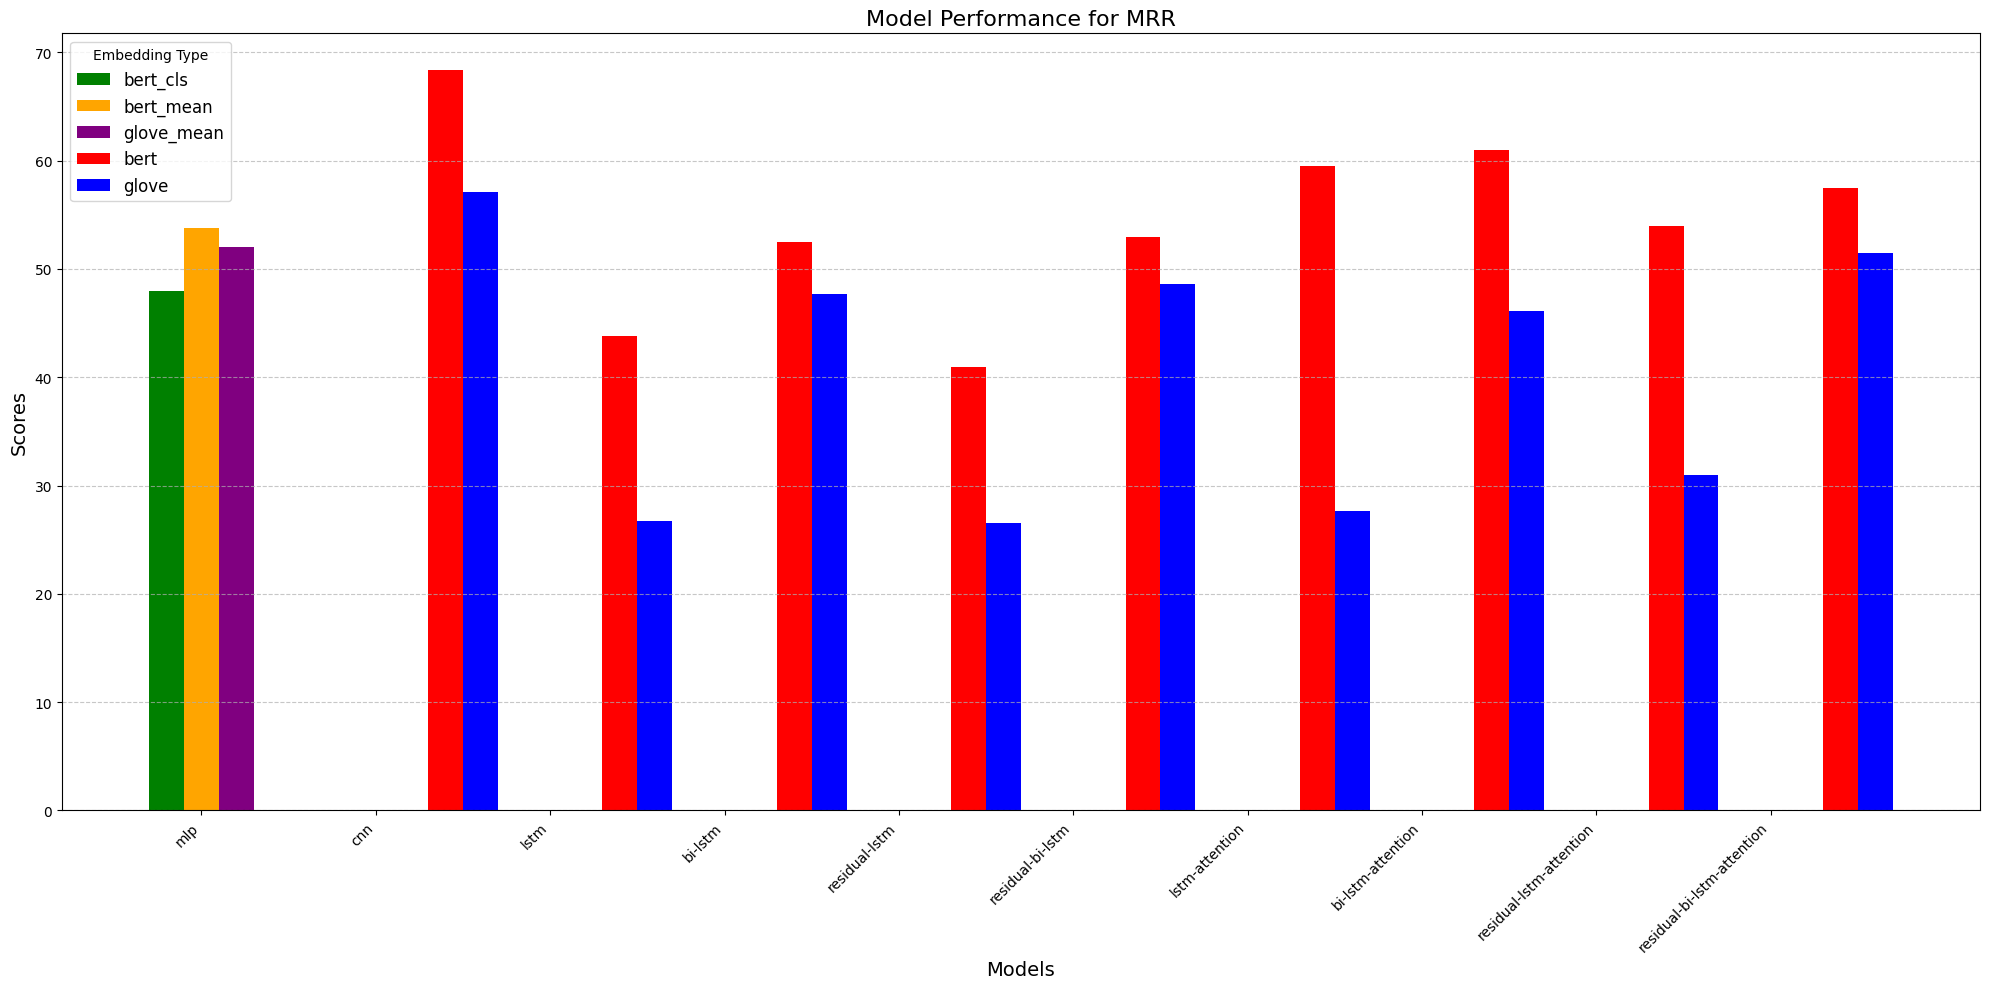

In [ ]:
dataset = "jdt"
if dataset == "gcc":
    json_data = gcc_result
else:
    json_data = jdt_result


data = []
for model, embeddings in json_data.items():
    for embedding_type, metrics in embeddings.items():
        for metric, value in metrics.items():
            data.append([model, embedding_type, metric, value])

df = pd.DataFrame(data, columns=['model', 'embedding', 'metric', 'value'])

metrics = df['metric'].unique()
models = df['model'].unique()
embeddings = df['embedding'].unique()

colors = {'bert': 'red', 'glove': 'blue', 'bert_cls': 'green', 'bert_mean': 'orange', 'glove_mean': 'purple'}

for metric in metrics:
    plt.figure(figsize=(20, 10))
    
    metric_df = df[df['metric'] == metric]
    
    x = np.arange(len(models))
    width = 0.2
    
    for i, embedding in enumerate(embeddings):
        values = []
        for model in models:
            if not metric_df[(metric_df['model'] == model) & (metric_df['embedding'] == embedding)].empty:
                values.append(metric_df[(metric_df['model'] == model) & (metric_df['embedding'] == embedding)]['value'].iloc[0])
            else:
                values.append(0) 
        
        plt.bar(x + i*width, values, width, label=embedding, color=colors.get(embedding))

    plt.ylabel('Scores', fontsize=14)
    plt.xlabel('Models', fontsize=14)
    plt.title(f'Model Performance for {metric.upper()}', fontsize=16)
    plt.xticks(x + width, models, rotation=45, ha="right")
    plt.legend(title='Embedding Type', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.savefig(f'./output/{dataset}_{metric}_performance.png')
    
plt.show()